# ***California Fire Detection***




---


In [1]:
!pip install plotly
!pip install geopandas==0.3.0
!pip install pyshp==1.2.10
!pip install shapely==1.6.3
!pip install geopandas --upgrade
!pip install plotly-geo

     |████████████████████████████████| 888 kB 5.0 MB/s 
     |████████████████████████████████| 15.4 MB 32.6 MB/s 
     |████████████████████████████████| 6.3 MB 27.9 MB/s 
     |████████████████████████████████| 176 kB 5.3 MB/s 
  Created wheel for pyshp: filename=pyshp-1.2.10-py3-none-any.whl size=20493 sha256=93d392b2a0b0e9632b481b91d4d9a7c98cea7299e840ed441aadbd5a56b82bed
  Stored in directory: /root/.cache/pip/wheels/aa/cb/ed/c4af42e7718157f9a76dea841c585e0577742ffed5a5b17d32
Successfully built pyshp
     |████████████████████████████████| 223 kB 5.0 MB/s 
  Created wheel for shapely: filename=Shapely-1.6.3-cp37-cp37m-linux_x86_64.whl size=635711 sha256=08553185267ed43d92e9b588a7bb130c5545f350619bf9c1fbbaa8538adc7a92
  Stored in directory: /root/.cache/pip/wheels/89/9f/1e/de1b1c770313c6a9838cc9c4da4c59f5b2db78b34078d29d01
Successfully built shapely
  Attempting uninstall: shapely
    Found existing installation: Shapely 1.8.0
    Uninstalling Shapely-1.8.0:
      Successfully uni

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.impute import SimpleImputer

import folium
import math

import plotly.figure_factory as ff
import plotly.express as px

California is one of the places having the most deadliest and destructive wildfire seasons. The dataset contains the list of Wildfires that has occurred in California between 2013 and 2019. The dataset contains the location where wildfires have occurred including the County name, latitude and longitude values and also details on when the wildfire has started.

This data helps to generate insights on what locations in California are under fire threat, what time do Wildfires usually occur and how frequent and devastating they are!!

## **Import Data**

In [4]:
dataset = pd.read_csv('California_Fire_Cleaned.csv')
dataset.head(15)

,Unnamed: 0,AcresBurned,AdminUnit,ArchiveYear,CalFireIncident,Counties,CountyIds,Extinguished,Fatalities,Featured,Final,Injuries,Latitude,Location,Longitude,MajorIncident,Name,PercentContained,Started,Status,Active Time,FIPS
0,0,257314.0,Stanislaus National Forest/Yosemite National Park,2013,True,Tuolumne,55,2013-09-06 18:30:00,NaN,False,True,NaN,37.857000,3 miles east of Groveland along Hwy 120,-120.086000,False,Rim Fire,100.0,2013-08-17 15:25:00,Finalized,20 days 03:05:00,6109.0
1,1,30274.0,USFS Angeles National Forest/Los Angeles Count...,2013,True,Los Angeles,19,2013-06-08 18:30:00,NaN,False,True,NaN,34.585595,Angeles National Forest,-118.423176,False,Powerhouse Fire,100.0,2013-05-30 15:28:00,Finalized,9 days 03:02:00,6037.0
2,2,27531.0,CAL FIRE Riverside Unit / San Bernardino Natio...,2013,True,Riverside,33,2013-07-30 18:00:00,NaN,False,True,NaN,33.709500,Hwy 243 & Hwy 74 near Mountain Center,-116.728850,False,Mountain Fire,100.0,2013-07-15 13:43:00,Finalized,15 days 04:17:00,6065.0
3,3,27440.0,Tahoe National Forest,2013,False,Placer,31,2013-08-30 08:00:00,NaN,False,True,NaN,39.120000,"Deadwood Ridge, northeast of Foresthill",-120.650000,False,American Fire,100.0,2013-08-10 16:30:00,Finalized,19 days 15:30:00,6061.0
4,4,24251.0,Ventura County Fire/CAL FIRE,2013,True,Ventura,56,2013-05-11 06:30:00,NaN,False,True,10.0,0.000000,Southbound Highway 101 at Camarillo Springs Ro...,0.000000,True,Springs Fire,100.0,2013-05-02 07:01:00,Finalized,8 days 23:29:00,6111.0
5,5,22992.0,Sierra National Forest,2013,False,Fresno,10,2013-09-24 20:15:00,NaN,False,True,NaN,37.279000,Seven miles north of Big Creek,-119.318000,False,Aspen Fire,100.0,2013-07-22 22:15:00,Finalized,63 days 22:00:00,6019.0
6,6,20292.0,CAL FIRE Riverside Unit / San Bernardino Natio...,2013,True,Riverside,33,2013-08-12 18:00:00,NaN,False,True,26.0,33.861570,"Poppet Flats Rd near Hwy 243, south of Banning",-116.904270,True,Silver Fire,100.0,2013-08-07 14:05:00,Finalized,5 days 03:55:00,6065.0
7,7,14754.0,Klamath National Forest,2013,False,Siskiyou,47,2013-08-31 06:45:00,NaN,False,True,NaN,41.320000,"North Fork of the Salmon River, West of Sawyer...",-123.176000,False,Salmon River Complex,100.0,2013-07-31 22:00:00,Finalized,30 days 08:45:00,6093.0
8,8,12503.0,Six Rivers National Forest,2013,False,Humboldt,12,2013-08-12 12:00:00,NaN,False,True,NaN,41.035000,Tish Tang Ridge east of Hoopa Valley Reservation,-123.488000,False,Corral Complex,100.0,2013-08-10 11:40:00,Finalized,2 days 00:20:00,6023.0
9,9,11429.0,CAL FIRE Tehama-Glenn Unit,2013,True,Tehama,52,2013-08-29 16:45:00,NaN,False,True,5.0,40.042630,"Near Deer Creek, 12 miles east of Los Molinos.",-121.853970,True,Deer Fire,100.0,2013-08-23 14:15:00,Finalized,6 days 02:30:00,6103.0


In [ ]:
dataset.columns

Index(['Unnamed: 0', 'AcresBurned', 'AdminUnit', 'ArchiveYear',
       'CalFireIncident', 'Counties', 'CountyIds', 'Extinguished',
       'Fatalities', 'Featured', 'Final', 'Injuries', 'Latitude', 'Location',
       'Longitude', 'MajorIncident', 'Name', 'PercentContained', 'Started',
       'Status', 'Active Time', 'FIPS'],
      dtype='object')

In [ ]:
dataset.dtypes

Unnamed: 0            int64
AcresBurned         float64
AdminUnit            object
ArchiveYear           int64
CalFireIncident        bool
Counties             object
CountyIds            object
Extinguished         object
Fatalities          float64
Featured               bool
Final                  bool
Injuries            float64
Latitude            float64
Location             object
Longitude           float64
MajorIncident          bool
Name                 object
PercentContained    float64
Started              object
Status               object
Active Time          object
FIPS                float64
dtype: object

# ***Analysis***

In [ ]:
map = folium.Map(location=[37.160317,-120.621407], tiles="cartodb positron", zoom_start=7, height = "75%", width = "75%")
for i in range(len(dataset)):
    folium.Circle(
        location=[dataset.loc[i,'Latitude'], dataset.loc[i,'Longitude']],
        radius=math.sqrt(float(dataset.loc[i,'AcresBurned'])*4046.86/math.pi), # Convert acres to meters
        tooltip=str(dataset.loc[i,'Name'])+', '+str(dataset.loc[i,'ArchiveYear']),
        color="#e08a3f",
        fill=True,
        fill_color="#e08a3f",
    ).add_to(map)

title_html = '''
             <h3 align="center" style="font-size:25px"><b>Geospatial distribution of wildfires in California</b></h3>
             '''
map.get_root().html.add_child(folium.Element(title_html))    
    
map

In [ ]:
v = dataset[['Counties','FIPS']].value_counts().to_frame()
v = v.reset_index()
v.columns =  ['County', 'FIPS', 'TotalFires']
v

,County,FIPS,TotalFires
0,Riverside,6065.0,146
1,San Diego,6073.0,89
2,Butte,6007.0,66
3,Shasta,6089.0,64
4,San Luis Obispo,6079.0,64
5,Kern,6029.0,62
6,Fresno,6019.0,57
7,Siskiyou,6093.0,57
8,San Bernardino,6071.0,53
9,Tehama,6103.0,51


In [ ]:
v = v.dropna(how='any',axis=0) 

values = v['TotalFires'].tolist()
fips = v['FIPS'].tolist()

endpts = list(np.mgrid[min(values):max(values):4j])
colorscale = ["#002047","#2b82ed","#0057a3","#6190c9","#c2ddff"]
fig = ff.create_choropleth(
    fips=fips, values=values, scope=['California'], show_state_data=True,
    colorscale=colorscale, binning_endpoints=endpts, round_legend_values=False,
    plot_bgcolor='rgb(229,229,229)',
    paper_bgcolor='rgb(229,229,229)',
    legend_title='Total Fires by County',
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.5},
    exponent_format=True,
)
fig.layout.template = None
fig.show()



1.   *Riverside had the most wild fires* *Imperial County did not have any wild fires*
2.   *Imperial County did not have any wild fires*



*Riverside had the most wild fires*

In [ ]:
dataset[dataset["Counties"] == "Imperial"] # Proof that imperial county did not have wild fires

,Unnamed: 0,AcresBurned,AdminUnit,ArchiveYear,CalFireIncident,Counties,CountyIds,Extinguished,Fatalities,Featured,Final,Injuries,Latitude,Location,Longitude,MajorIncident,Name,PercentContained,Started,Status,Active Time,FIPS


In [ ]:
dataset['Month'] = [i.month for i in pd.to_datetime(dataset['Started'])]
new_Data = dataset.groupby(['ArchiveYear', 'Month'])['Counties'].count().reset_index()
new_Data.rename(columns = {"Counties" : "Wild Fire Count"}, inplace = True)

In [ ]:
fig = px.line(new_Data, x="Month", y="Wild Fire Count", color = "ArchiveYear", title='Wild Fire Frequency over the month in a given year')
fig.show()

More wild fires seem to be occuring during the summer time. Makes sense as during this time the temperatures are high and it is more dry making wild fires a more likely occurence.

In [5]:
data = pd.read_csv("cleaned.csv", index_col = 0)
data

,AcresBurned,Counties,Latitude,Longitude,Started,FIPS,Temp Day One,Temp Day Two,Temp Day Three,Temp Day Four,Temp Day Five,MaxTemp Day One,MaxTemp Day Two,MaxTemp Day Three,MaxTemp Day Four,MaxTemp Day Five,MinTemp Day One,MinTemp Day Two,MinTemp Day Three,MinTemp Day Four,MinTemp Day Five,Humidity Day One,Humidity Day Two,Humidity Day Three,Humidity Day Four,Humidity Day Five,Fire
0,257314.0,Tuolumne,37.857000,-120.086000,2013-08-17 15:25:00,6109.0,74.0,78.0,79.0,79.0,80.0,83.0,87.0,88.0,88.0,89.0,50.0,52.0,52.0,52.0,54.0,38.000,33.000,34.000,35.125,33.000,True
1,30274.0,Los Angeles,34.585595,-118.423176,2013-05-30 15:28:00,6037.0,72.0,72.0,75.0,73.0,78.0,82.0,82.0,86.0,83.0,87.0,42.0,43.0,45.0,46.0,47.0,46.000,46.500,40.625,53.875,39.625,True
2,27531.0,Riverside,33.709500,-116.728850,2013-07-15 13:43:00,6065.0,82.0,77.0,79.0,82.0,84.0,88.0,82.0,84.0,88.0,90.0,66.0,65.0,65.0,66.0,68.0,34.750,51.375,48.375,27.875,27.000,True
3,27440.0,Placer,39.120000,-120.650000,2013-08-10 16:30:00,6061.0,74.0,73.0,68.0,67.0,67.0,85.0,83.0,77.0,77.0,78.0,45.0,44.0,45.0,41.0,40.0,44.625,42.750,53.125,56.250,53.000,True
4,22992.0,Fresno,37.279000,-119.318000,2013-07-22 22:15:00,6019.0,68.0,71.0,74.0,75.0,74.0,76.0,80.0,82.0,84.0,82.0,46.0,52.0,55.0,57.0,54.0,29.375,28.125,27.250,25.000,34.000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2941,0.0,Riverside,33.827979,-117.499619,2018-10-10 12:08:00,6065.0,70.0,69.0,77.0,65.0,71.0,74.0,74.0,85.0,67.0,78.0,63.0,63.0,69.0,64.0,64.0,59.500,56.375,48.625,73.750,64.875,False
2942,0.0,Nevada,39.409722,-121.000556,2018-06-28 15:03:04,6057.0,73.0,79.0,87.0,86.0,84.0,79.0,86.0,96.0,93.0,90.0,57.0,58.0,67.0,69.0,66.0,39.250,37.875,27.250,27.375,33.500,False
2943,0.0,Yolo,38.734634,-121.729691,2018-11-25 12:02:02,6113.0,58.0,58.0,55.0,59.0,55.0,64.0,64.0,57.0,63.0,57.0,50.0,50.0,51.0,53.0,51.0,64.250,63.625,86.000,83.875,82.875,False
2944,0.0,San Diego,33.351145,-117.403719,2018-10-22 19:20:44,6073.0,67.0,68.0,71.0,71.0,77.0,72.0,73.0,75.0,76.0,82.0,60.0,60.0,58.0,62.0,65.0,76.625,79.125,79.000,74.500,58.750,False


## **Confusion Matrix of OUR cleaned dataset** 

In [9]:
# Let's make our correlation matrix
corr_matrix = data.corr()


(25.5, -0.5)

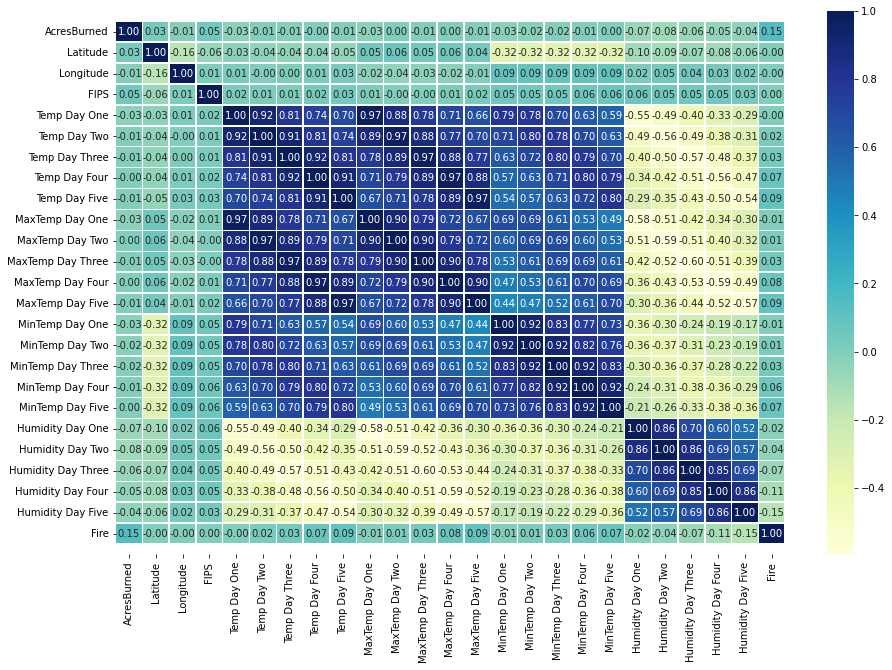

In [10]:

fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

## **Improved Model** 